# MNIST - Ensemble Learning
In this code exercise we are going to practice on creating different models. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier

import seaborn as sns 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics 
from sklearn.metrics import classification_report

np.random.seed(42)

# Data
Load the MNIST data and split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation, and 10,000 for testing).You can use the code below: 

In [52]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
# print(mnist.DESCR)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

In [ ]:
# Hur ser datan ut?
X_train.shape


In [ ]:
# Visa första index
X_train[0]

In [ ]:
# Visualisera datan

index = 0

plt.imshow(X[index].reshape(28, 28), cmap='gray')
plt.title(y[index])
plt.show()

# Modelling
Instantiate a (1) Random Forest, (2) ExtraTree and (3) LinearSVC model.

# Model: Random forest

In [58]:
# Skapa modellen
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [59]:
# Träna modellen
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Testa accuracy score på dataset
y_val_pred = random_forest_clf.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(val_accuracy)

0.9692


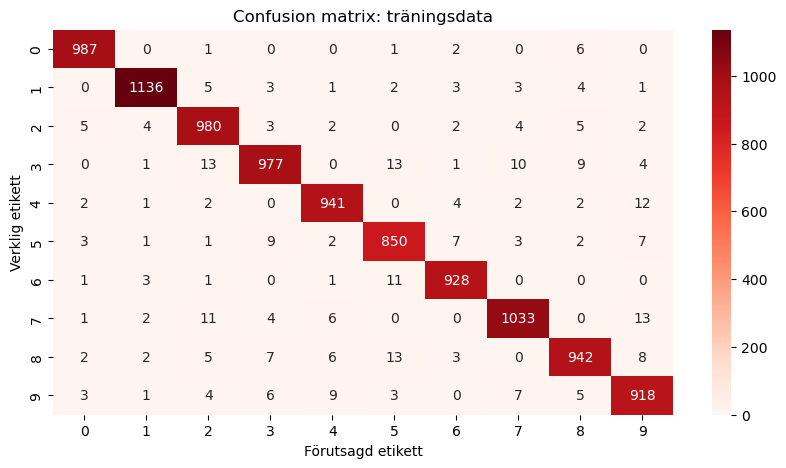

In [62]:
# Confusion matrix
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Förutsagd etikett")
plt.ylabel("Verklig etikett")
plt.title("Confusion matrix: träningsdata")
plt.show()

In [ ]:
# Rapport
print(metrics.classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       997
           1       0.99      0.98      0.98      1158
           2       0.96      0.97      0.97      1007
           3       0.97      0.95      0.96      1028
           4       0.97      0.97      0.97       966
           5       0.95      0.96      0.96       885
           6       0.98      0.98      0.98       945
           7       0.97      0.97      0.97      1070
           8       0.97      0.95      0.96       988
           9       0.95      0.96      0.96       956

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Model: Extra tree

In [63]:
# Skapa modell
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [64]:
# Träna modell
extra_trees_clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [65]:
# Testa accuracy score på datasetet
y_val_pred = extra_trees_clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(val_accuracy)

0.9715


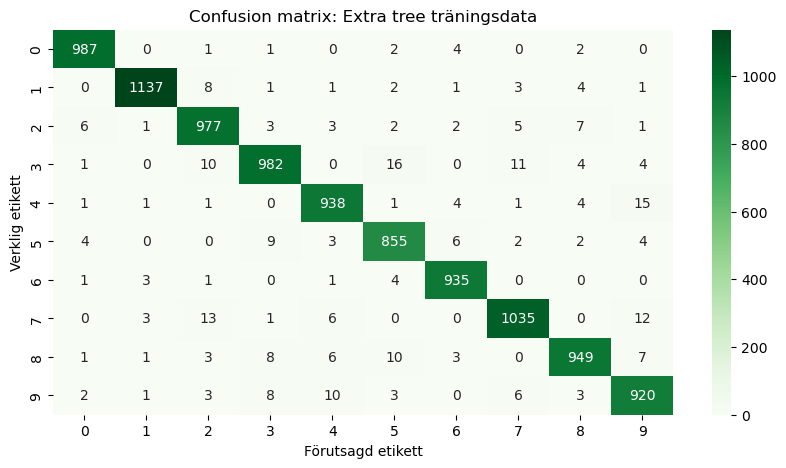

In [66]:
# Confusion matrix
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Förutsagd etikett")
plt.ylabel("Verklig etikett")
plt.title("Confusion matrix: Extra tree träningsdata")
plt.show()

In [ ]:
# Rapport
report = classification_report(y_val, y_val_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       997
           1       0.99      0.98      0.99      1158
           2       0.96      0.97      0.97      1007
           3       0.97      0.96      0.96      1028
           4       0.97      0.97      0.97       966
           5       0.96      0.97      0.96       885
           6       0.98      0.99      0.98       945
           7       0.97      0.97      0.97      1070
           8       0.97      0.96      0.97       988
           9       0.95      0.96      0.96       956

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Model: Support vector machines

In [78]:
# Skapa modell
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)

In [79]:
# Träna modell
svm_clf.fit(X_train, y_train)

c:\Users\bon19\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(max_iter=100, random_state=42, tol=20)

In [80]:
# Utvärdera träningset
y_val_pred = svm_clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(val_accuracy)

0.859


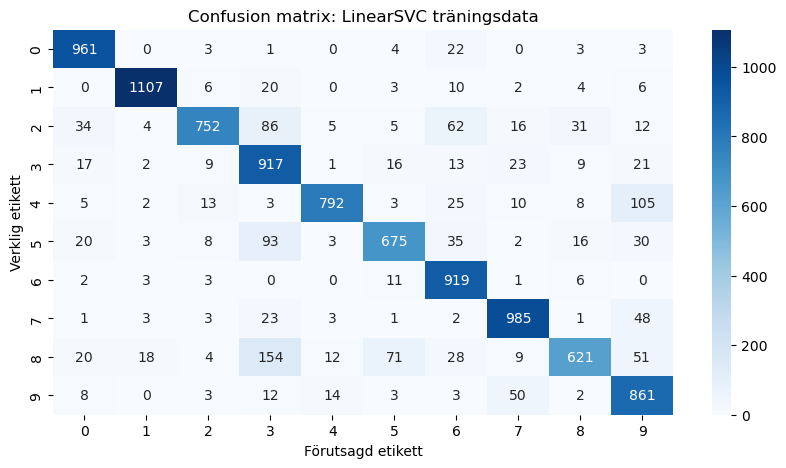

In [81]:
# Confusion matrix
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Förutsagd etikett")
plt.ylabel("Verklig etikett")
plt.title("Confusion matrix: LinearSVC träningsdata")
plt.show()

In [82]:
# rapport
svm_report = classification_report(y_val, y_val_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       997
           1       0.97      0.96      0.96      1158
           2       0.94      0.75      0.83      1007
           3       0.70      0.89      0.78      1028
           4       0.95      0.82      0.88       966
           5       0.85      0.76      0.81       885
           6       0.82      0.97      0.89       945
           7       0.90      0.92      0.91      1070
           8       0.89      0.63      0.74       988
           9       0.76      0.90      0.82       956

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



# Voting classifier
Create a voting classifier, train it on the training data and evaluate it on the validation data using the score method. 

In [83]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf)
]

voting_clf = VotingClassifier(named_estimators)

In [84]:
# Träna voting classifier
voting_clf.fit(X_train, y_train)

c:\Users\bon19\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('svm_clf',
                              LinearSVC(max_iter=100, random_state=42,
                                        tol=20))])

In [86]:
# Utvärdera voting classifier
y_val_pred = voting_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(accuracy)

0.9693


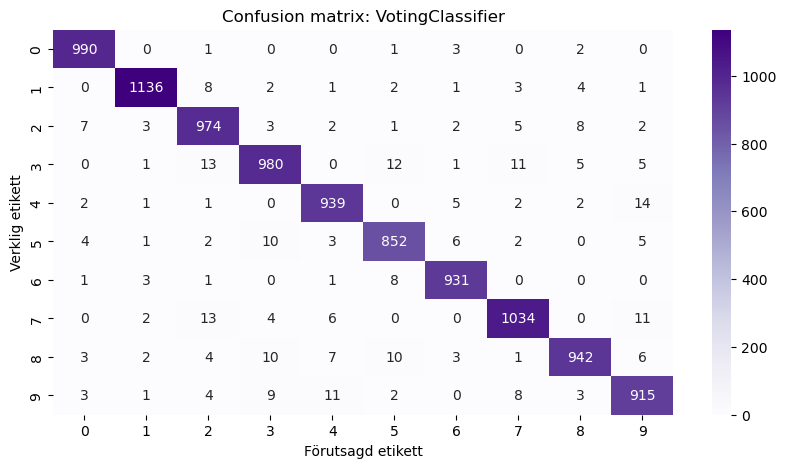

In [89]:
# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Förutsagd etikett")
plt.ylabel("Verklig etikett")
plt.title("Confusion matrix: VotingClassifier")
plt.show()

In [90]:
# rapport
vot_report = classification_report(y_val, y_val_pred)
print(vot_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       997
           1       0.99      0.98      0.98      1158
           2       0.95      0.97      0.96      1007
           3       0.96      0.95      0.96      1028
           4       0.97      0.97      0.97       966
           5       0.96      0.96      0.96       885
           6       0.98      0.99      0.98       945
           7       0.97      0.97      0.97      1070
           8       0.98      0.95      0.96       988
           9       0.95      0.96      0.96       956

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Evaluate your best model on the test set. 

In [91]:
# Samla alla modeller i ett ställe
models = {
    "Random Forest": random_forest_clf,
    "Extra Trees": extra_trees_clf,
    "LinearSVC": svm_clf,
    "VotingClassifier": voting_clf
}

Random Forest 0.9645


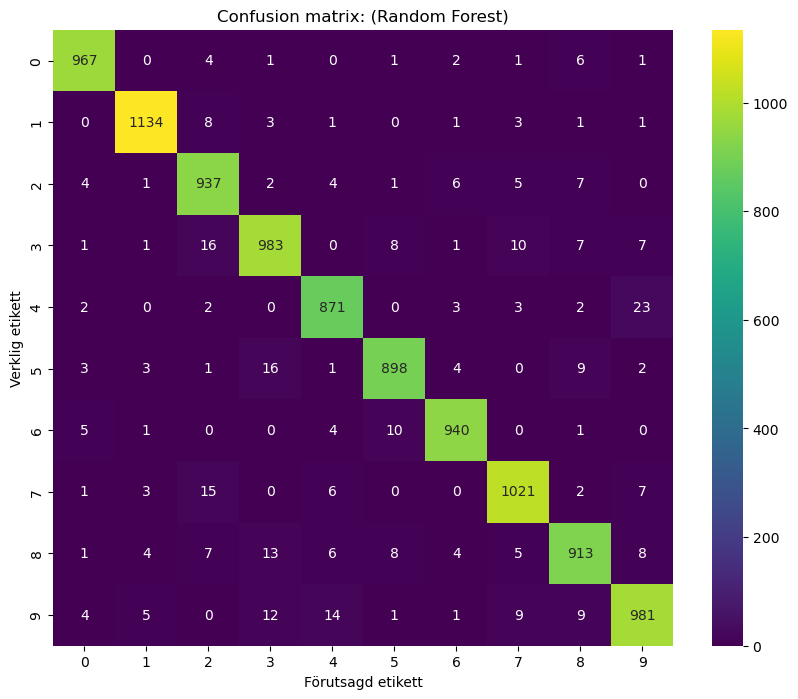

Klassificeringsrapport (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.98      0.98      0.98      1152
           2       0.95      0.97      0.96       967
           3       0.95      0.95      0.95      1034
           4       0.96      0.96      0.96       906
           5       0.97      0.96      0.96       937
           6       0.98      0.98      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.95      0.94      0.95       969
           9       0.95      0.95      0.95      1036

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Extra Trees 0.9691


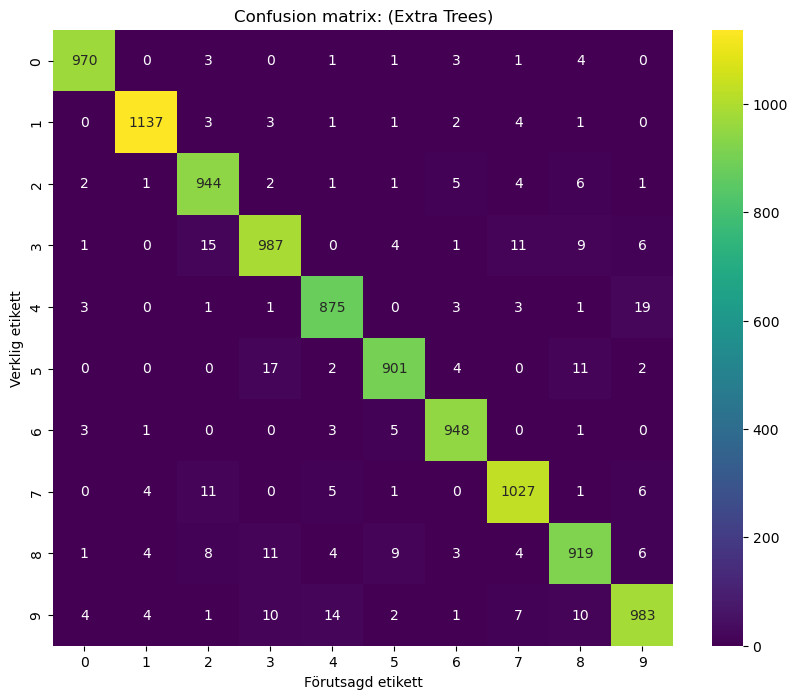

Klassificeringsrapport (Extra Trees):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.99      0.99      0.99      1152
           2       0.96      0.98      0.97       967
           3       0.96      0.95      0.96      1034
           4       0.97      0.97      0.97       906
           5       0.97      0.96      0.97       937
           6       0.98      0.99      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.95      0.95      0.95       969
           9       0.96      0.95      0.95      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

LinearSVC 0.8566


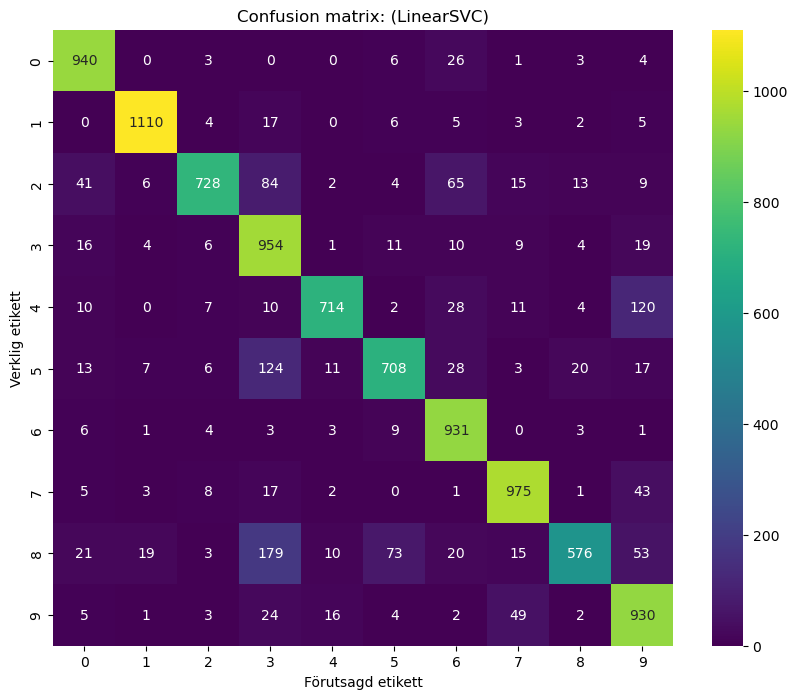

Klassificeringsrapport (LinearSVC):
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       983
           1       0.96      0.96      0.96      1152
           2       0.94      0.75      0.84       967
           3       0.68      0.92      0.78      1034
           4       0.94      0.79      0.86       906
           5       0.86      0.76      0.80       937
           6       0.83      0.97      0.90       961
           7       0.90      0.92      0.91      1055
           8       0.92      0.59      0.72       969
           9       0.77      0.90      0.83      1036

    accuracy                           0.86     10000
   macro avg       0.87      0.85      0.85     10000
weighted avg       0.87      0.86      0.85     10000

VotingClassifier 0.965


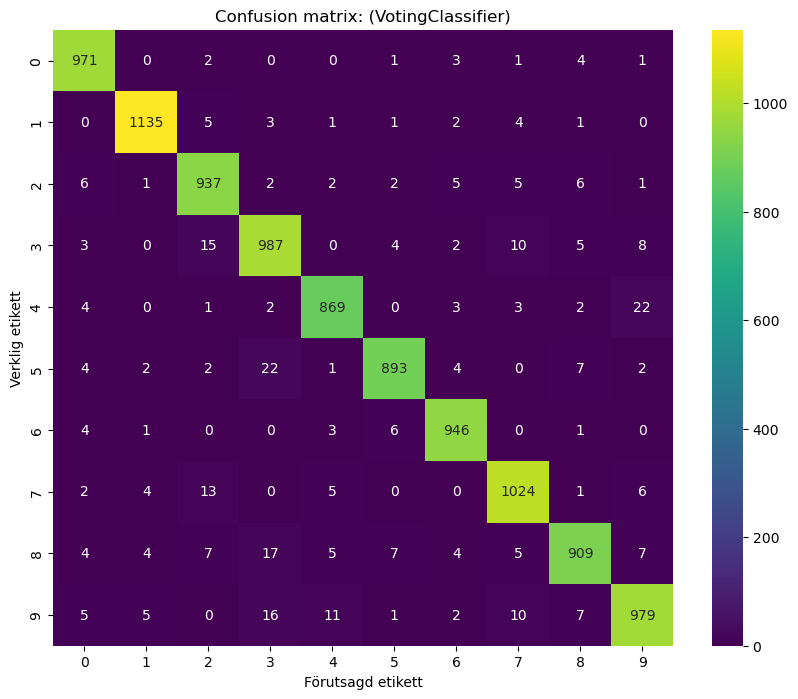

Klassificeringsrapport (VotingClassifier):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.95      0.97      0.96       967
           3       0.94      0.95      0.95      1034
           4       0.97      0.96      0.96       906
           5       0.98      0.95      0.96       937
           6       0.97      0.98      0.98       961
           7       0.96      0.97      0.97      1055
           8       0.96      0.94      0.95       969
           9       0.95      0.94      0.95      1036

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



In [ ]:
# Utvärdera modeller med en loop
for name, model in models.items():
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print((name), (accuracy))

    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
    plt.xlabel("Förutsagd etikett")
    plt.ylabel("Verklig etikett")
    plt.title(f"Confusion matrix: ({name})")
    plt.show()

    report = classification_report(y_test, y_test_pred)
    print(f"Klassificieringsrapport: ({name}):\n{report}")

In [106]:
for name, model in models.items():
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Accuracy: {name}: {accuracy}")

Accuracy: Random Forest: 0.9645
Accuracy: Extra Trees: 0.9691
Accuracy: LinearSVC: 0.8566
Accuracy: VotingClassifier: 0.965
